<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Classification
# load the dataset
data = pd.read_csv("w3classif.csv", names=["X1", "X2", "Y"])

Text(0.5, 0, 'X2')

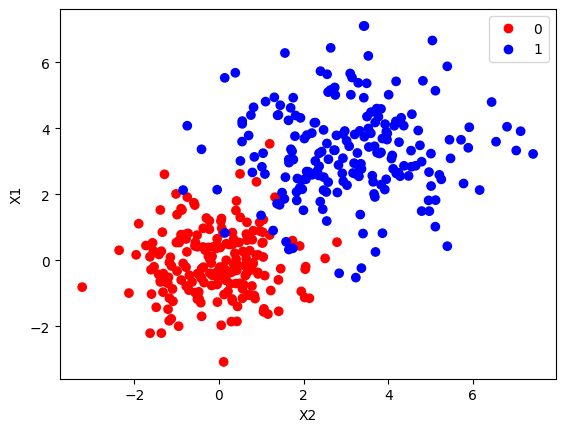

In [ ]:
# @title X1 vs X2

from matplotlib.colors import ListedColormap

fig = plt.figure()
colours = ListedColormap(['r','b'])
scatter = plt.scatter(data.loc[:,"X1"], data.loc[:,"X2"], c=data.loc[:,"Y"], cmap=colours, label=data.loc[:,"Y"])
plt.legend(*scatter.legend_elements())
plt.ylabel('X1')
plt.xlabel('X2')

In [ ]:
# @title Split dataset
#split dataset into features and targets
X = data.drop("Y", axis=1)
y = data["Y"]

from sklearn.model_selection import train_test_split

# split into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
# @title Build and train a classifier

# create classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model on the training data

# make predictions on training data and calculate training Misclassification Rate

# make predictions on the test data and calculate test Misclassification Rate


Training Misclassification Rate: 2.8571%
Testing Misclassification Rate: 6.6667%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


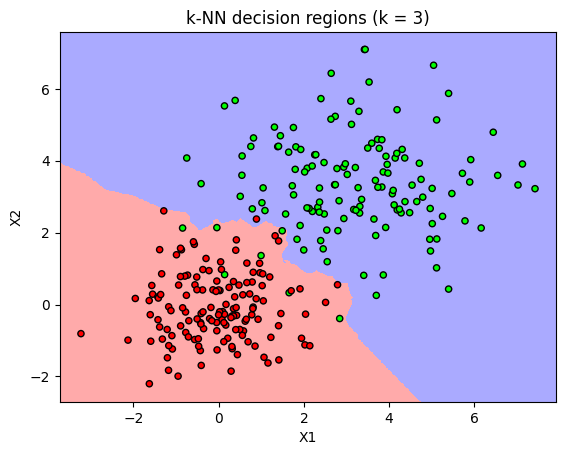

In [46]:
# @title Plotting the decision boundary for training data

X1_train = X_train.loc[:, "X1"]
X2_train = X_train.loc[:, "X2"]

# Generate a meshgrid of points to cover the feature space
h = 0.02
x_min, x_max = X1_train.min() - 0.5, X1_train.max() + 0.5
y_min, y_max = X2_train.min() - 0.5, X2_train.max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the points in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

# Plot the training data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X1_train, X2_train, c=y_train, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('k-NN decision regions (k = %d)' % k)
plt.show()

In [47]:
# @title Regression

# load the dataset
data_reg = pd.read_csv("w3regr.csv", names=["X", "Y"])

#split dataset into features and targets
X = data_reg.drop("Y", axis=1)
y = data_reg["Y"]

# split into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

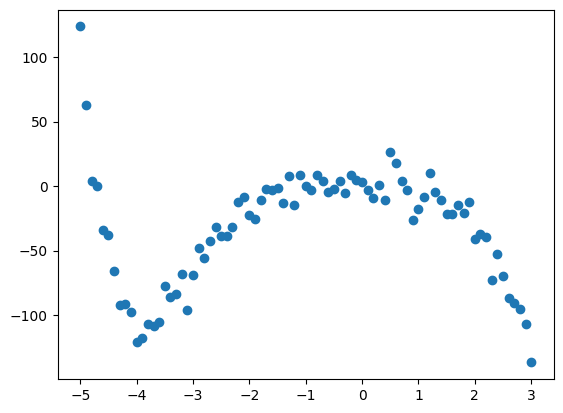

In [51]:
# @title X vs Y
plt.scatter(X, y)
plt.show()

In [50]:
# @title Build and train and regressor

# create classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k = 3
knr = KNeighborsRegressor(n_neighbors=k)

# fit the model on the training data


# make predictions on training data and evaluate the model using mean squared error


# make predictions on the test data and evaluate the model using mean squared error





Mean squared error of training: 211.1830147378477
Mean squared error of test: 149.94384224102356


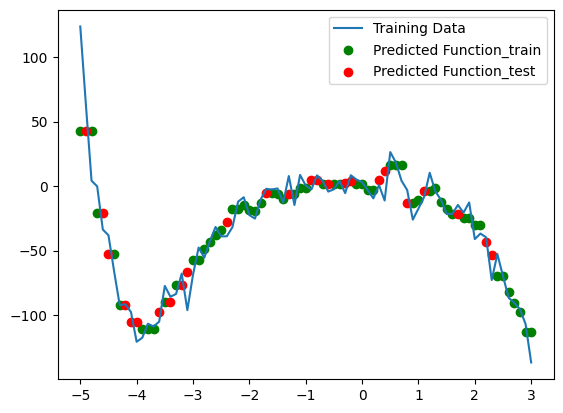

In [63]:
# Plot the training data, testing data, and predicted function
fig, ax = plt.subplots()

ax.plot(X, y, label='Training Data')

ax.scatter(X_train,y_train_pred, c= 'g', label='Predicted Function_train')
ax.scatter(X_test,y_test_pred, c ='r', label='Predicted Function_test')

plt.legend()
plt.show()